# Mean median imputation 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

IMPORT SKLEARN LIBRARIES

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

IMPORT DATASET

In [4]:
df = pd.read_csv("C:/Users/prian/OneDrive/Desktop/titanic_toy.csv")

In [5]:
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [6]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [8]:
df.sample(10)

,Age,Fare,Family,Survived
440,45.0,26.2500,2,1
417,18.0,13.0000,2,1
716,38.0,227.5250,0,1
739,NaN,7.8958,0,0
741,36.0,78.8500,1,0
533,NaN,22.3583,2,1
21,34.0,13.0000,0,1
690,31.0,57.0000,1,1
426,28.0,26.0000,1,1
473,23.0,13.7917,0,1


PERFORM TRAIN TEST SPLIT

In [9]:
x = df.drop(columns=['Survived'])
y = df['Survived']


In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [12]:
x_train.shape,x_test.shape

((712, 3), (179, 3))

In [13]:
x_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

CALCULATE MEAN MEDIAN(AGE|FARE) 

In [14]:
mean_age = x_train['Age'].mean()
median_age = x_train['Age'].median()

In [18]:
mean_fare = x_train['Fare'].mean()
median_fare = x_train['Fare'].median()

CREATE NEW COLUMN AND IMPUTE MISSING VALUES

In [19]:
x_train['Age_median'] = x_train['Age'].fillna(median_age)
x_train['Age_mean'] = x_train['Age'].fillna(mean_age)

In [20]:
x_train['Fare_median'] = x_train['Fare'].fillna(median_fare)
x_train['Fare_mean'] = x_train['Fare'].fillna(mean_fare)

In [21]:
x_train.sample(8)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
668,43.0,8.0500,0,43.0000,43.000000,8.0500,8.050000
289,22.0,7.7500,0,22.0000,22.000000,7.7500,7.750000
598,NaN,7.2250,0,14.4583,32.617597,7.2250,7.225000
736,48.0,34.3750,4,48.0000,48.000000,34.3750,34.375000
406,51.0,7.7500,0,51.0000,51.000000,7.7500,7.750000
835,39.0,83.1583,2,39.0000,39.000000,83.1583,83.158300
410,NaN,7.8958,0,14.4583,32.617597,7.8958,7.895800
194,44.0,NaN,0,44.0000,44.000000,14.4583,32.617597


REVIEW VARIANCE

In [23]:
print('Original Age variable variance:',x_train['Age'].var())
print('Age Variance after imputation:',x_train['Age_median'].var())
print('Age Variance after mean imputation:',x_train['Age_mean'].var())

Original Age variable variance: 204.3495133904614
Age Variance after imputation: 200.55085535155024
Age Variance after mean imputation: 163.1347828052615


In [24]:
print('Original Fare variable variance:',x_train['Fare'].var())
print('Fare Variance after imputation:',x_train['Fare_median'].var())
print('Fare Variance after mean imputation:',x_train['Fare_mean'].var())

Original Fare variable variance: 2448.197913706318
Fare Variance after imputation: 2340.0910219753637
Fare Variance after mean imputation: 2324.2385256705547


CHANGES IN DISTRIBUTION IN AGE 

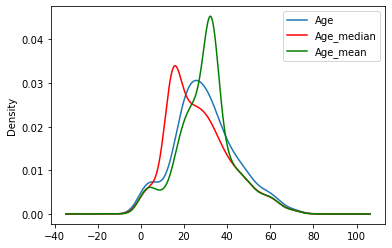

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
x_train['Age'].plot(kind='kde',ax=ax)
x_train['Age_median'].plot(kind='kde',ax=ax,color='red')
x_train['Age_mean'].plot(kind='kde',ax=ax,color='green')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

CHANGES IN DISTRIBUTION IN FARE

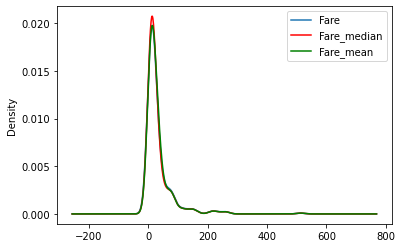

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
x_train['Fare'].plot(kind='kde',ax=ax)
x_train['Fare_median'].plot(kind='kde',ax=ax,color='red')
x_train['Fare_mean'].plot(kind='kde',ax=ax,color='green')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

CHECK COVARIANCE

In [29]:
x_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858859,66.665205
Fare,70.719262,2448.197914,17.258917,90.432552,49.169279,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-4.649792,-5.237797,16.476305,16.385048
Age_median,204.349513,90.432552,-4.649792,200.550855,154.655944,83.842733,85.853688
Age_mean,204.349513,49.169279,-5.237797,154.655944,163.134783,45.356620,46.679696
Fare_median,64.858859,2448.197914,16.476305,83.842733,45.356620,2340.091022,2324.238526
Fare_mean,66.665205,2448.197914,16.385048,85.853688,46.679696,2324.238526,2324.238526


CHECK CORRELETION 

In [30]:
x_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.087356,0.090156
Fare,0.092644,1.000000,0.208268,0.128809,0.077538,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.198528,-0.247957,0.205942,0.205499
Age_median,1.000000,0.128809,-0.198528,1.000000,0.855029,0.122387,0.125750
Age_mean,1.000000,0.077538,-0.247957,0.855029,1.000000,0.073409,0.075808
Fare_median,0.087356,1.000000,0.205942,0.122387,0.073409,1.000000,0.996607
Fare_mean,0.090156,1.000000,0.205499,0.125750,0.075808,0.996607,1.000000


BOXPLOT FOR AGE

<AxesSubplot:>

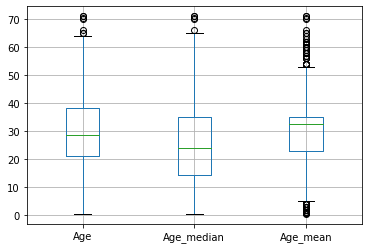

In [31]:
x_train[['Age','Age_median','Age_mean']].boxplot()

BOXPLOT FOR FARE

<AxesSubplot:>

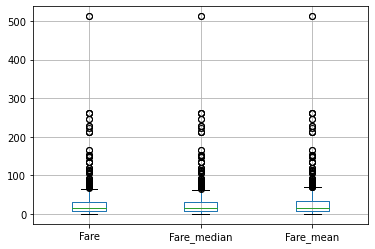

In [33]:
x_train[['Fare','Fare_median','Fare_mean']].boxplot()

# Arbitary value imputation

IMPORT LIBRARIES

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

IMPORT SKLEARN LIBRARIES

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

IMPORT DATASET

In [35]:
df = pd.read_csv("C:/Users/prian/OneDrive/Desktop/titanic_toy.csv")
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [36]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


PERFORM TRAIN TEST SPLIT

In [38]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

CREATE NEW COLUMN AND REPLACE VALUE(AGE-99 | FARE-999)

In [41]:
x_train['Age_99'] = x_train['Age'].fillna(99)
x_train['Age_minus'] = x_train['Age'].fillna(-1)

In [42]:
x_train['Fare_99'] = x_train['Fare'].fillna(99)
x_train['Fare_minus'] = x_train['Fare'].fillna(-1)

In [44]:
x_train.sample(8)

,Age,Fare,Family,Age_99,Age_minus,Fare_99,Fare_minus
535,7.0,26.2500,2,7.0,7.0,26.2500,26.2500
118,24.0,247.5208,1,24.0,24.0,247.5208,247.5208
529,23.0,11.5000,3,23.0,23.0,11.5000,11.5000
696,44.0,8.0500,0,44.0,44.0,8.0500,8.0500
632,32.0,30.5000,0,32.0,32.0,30.5000,30.5000
363,35.0,7.0500,0,35.0,35.0,7.0500,7.0500
551,27.0,26.0000,0,27.0,27.0,26.0000,26.0000
30,40.0,27.7208,0,40.0,40.0,27.7208,27.7208


REVIEW VARIANCE

In [48]:
print('Original Age variable variance:',x_train['Age'].var())
print('Age Variance after 99 used imputation:',x_train['Age_99'].var())
print('Age Variance after -1 used  imputation:',x_train['Age_minus'].var())

Original Age variable variance: 204.3495133904614
Age Variance after 99 used imputation: 951.7275570187172
Age Variance after -1 used  imputation: 318.0896202624484


In [49]:
print('Original Fare variable variance:',x_train['Fare'].var())
print('Fare Variance after 99 used imputation:',x_train['Fare_99'].var())
print('Fare Variance after -1 used  imputation:',x_train['Fare_minus'].var())

Original Fare variable variance: 2448.197913706318
Fare Variance after 99 used imputation: 2536.0773428319685
Fare Variance after -1 used  imputation: 2378.5676784883503


REVIEW DISTRIBUTION AGE

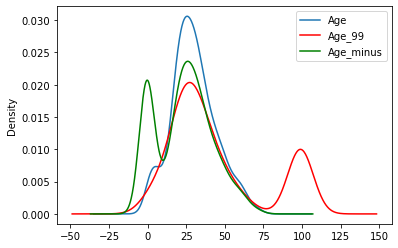

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111)
x_train['Age'].plot(kind='kde',ax=ax)
x_train['Age_99'].plot(kind='kde',ax=ax,color='red')
x_train['Age_minus'].plot(kind='kde',ax=ax,color='green')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

REVIEW DISTRIBUTION FARE

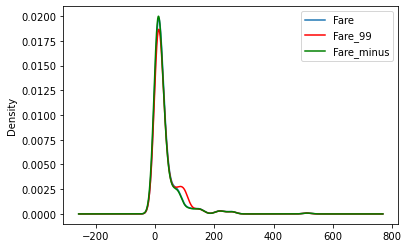

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111)
x_train['Fare'].plot(kind='kde',ax=ax)
x_train['Fare_99'].plot(kind='kde',ax=ax,color='red')
x_train['Fare_minus'].plot(kind='kde',ax=ax,color='green')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

CHECK COVARIANCE

In [53]:
x_train.cov()

,Age,Fare,Family,Age_99,Age_minus,Fare_99,Fare_minus
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,73.268412,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,16.051452,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-100.878826,-94.317400
Age_minus,204.349513,125.558364,-4.149246,-189.535540,318.089620,128.692715,114.394141
Fare_99,73.268412,2448.197914,16.051452,-100.878826,128.692715,2536.077343,2216.958409
Fare_minus,63.321188,2448.197914,16.553989,-94.317400,114.394141,2216.958409,2378.567678


CHECK CORRELETION

In [54]:
x_train.corr()

,Age,Fare,Family,Age_99,Age_minus,Fare_99,Fare_minus
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.095527,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.192723,0.205233
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.064933,-0.062687
Age_minus,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.143284,0.131514
Fare_99,0.095527,1.000000,0.192723,-0.064933,0.143284,1.000000,0.902648
Fare_minus,0.084585,1.000000,0.205233,-0.062687,0.131514,0.902648,1.000000
